In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# Specify the encoding, try 'latin-1' or 'cp1252' if 'utf-8' doesn't work
data = pd.read_csv('/content/drive/MyDrive/ML MINI PROJECT/Dataset/spam (1).csv', encoding='latin-1')

print(data)


        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


Remove duplicate texts

In [3]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Display the cleaned dataset
print("Cleaned Dataset:")
print(data_cleaned.head())


Cleaned Dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_dataset.csv', index=False)


PREPROCESSING


In [5]:
import re
from sklearn.preprocessing import LabelEncoder

# Step 1: Rename columns for clarity
if 'v1' in data_cleaned.columns and 'v2' in data_cleaned.columns:
    data_cleaned.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
else:
    print("Expected columns 'v1' and 'v2' are missing. Please check the dataset structure.")

# Step 2: Clean the text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

data_cleaned['message'] = data_cleaned['message'].apply(clean_text)

# Step 3: Encode the target variable (label)
label_encoder = LabelEncoder()
data_cleaned['label'] = label_encoder.fit_transform(data_cleaned['label'])

# Display the mapping for labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Step 4: Save the preprocessed dataset
preprocessed_path = 'preprocessed_dataset.csv'
data_cleaned.to_csv(preprocessed_path, index=False)

print(f"Preprocessed data saved to: {preprocessed_path}")


Label Mapping: {'ham': 0, 'spam': 1}
Preprocessed data saved to: preprocessed_dataset.csv


<ipython-input-5-11966c73d787>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
<ipython-input-5-11966c73d787>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['message'] = data_cleaned['message'].apply(clean_text)
<ipython-input-5-11966c73d787>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

TRAINING AND TESTING



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Step 1: Feature Selection (Text Vectorization)
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Extract top 5000 important features

# Apply TF-IDF transformation on the 'v2' column (messages)
X = tfidf_vectorizer.fit_transform(data_cleaned['message']).toarray()

# Step 2: Target Variable (No Scaling Needed)
y = data_cleaned['label']

# Display the shape of features and target
print(f"Features Shape (X): {X.shape}")
print(f"Target Shape (y): {y.shape}")

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDataset split into training and testing sets.")
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Features Shape (X): (5169, 5000)
Target Shape (y): (5169,)

Dataset split into training and testing sets.
Training Set: (4135, 5000), Testing Set: (1034, 5000)


In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features (applied only after TF-IDF vectorization)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nFeatures scaled successfully.")



Features scaled successfully.


MODEL TRAINING



Confusion Matrix for Logistic Regression:


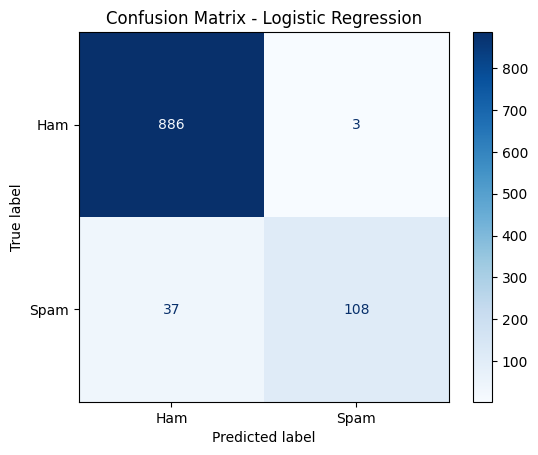


Confusion Matrix for Naive Bayes:


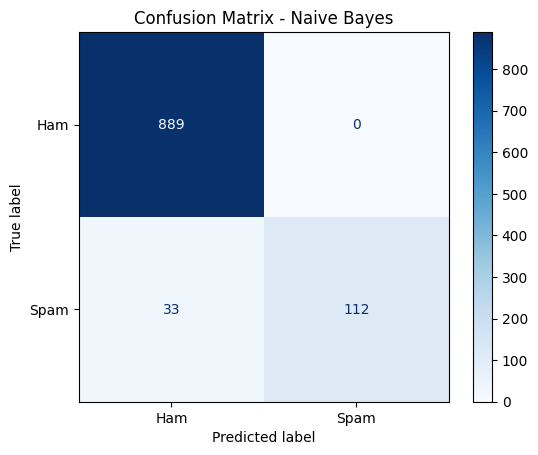


Confusion Matrix for Random Forest:


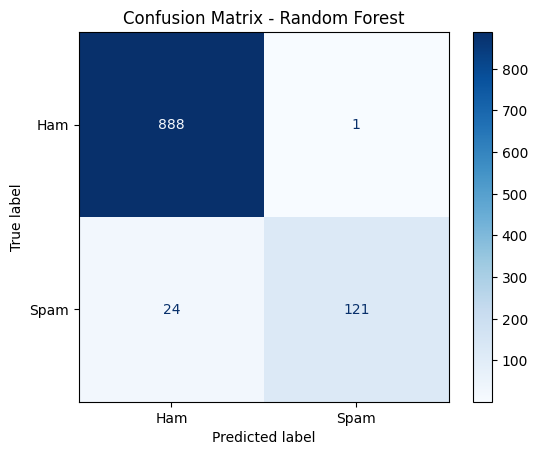


Confusion Matrix for K-Nearest Neighbors:


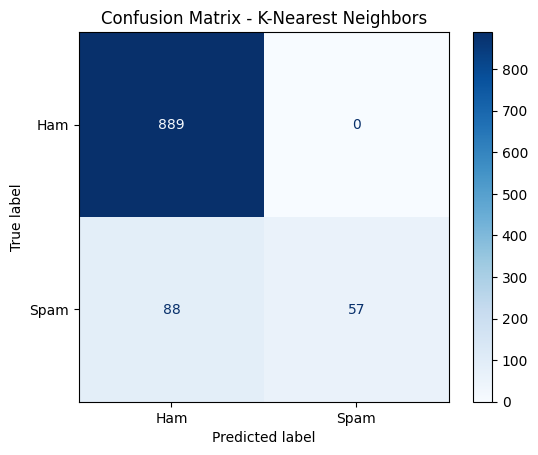


Confusion Matrix for Decision Tree:


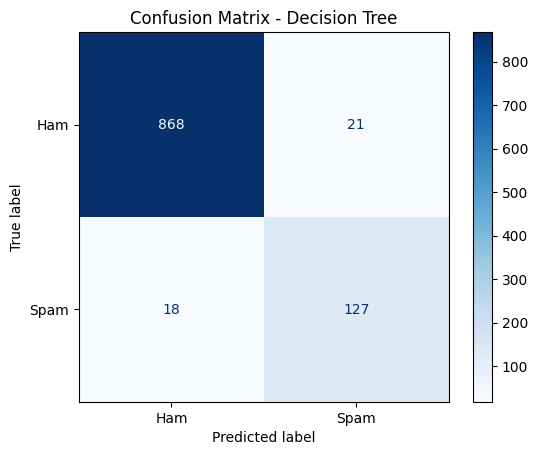


Confusion Matrix for Support Vector Machine:


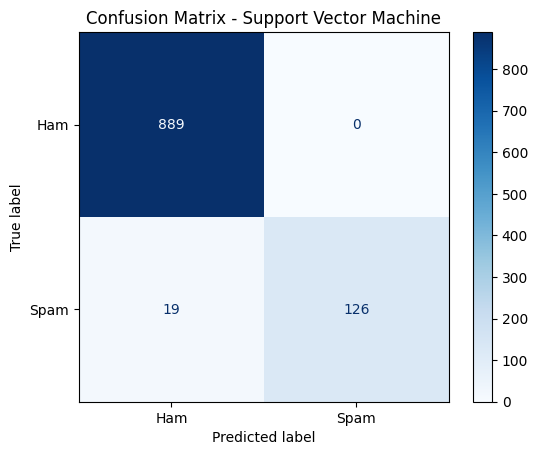


Model Accuracies:
Logistic Regression: 96.13%
Naive Bayes: 96.81%
Random Forest: 97.58%
K-Nearest Neighbors: 91.49%
Decision Tree: 96.23%
Support Vector Machine: 98.16%

Best Model: Support Vector Machine with Accuracy: 98.16%


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # Ensure LogisticRegression is imported
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB # Importing MultinomialNB
from sklearn.neighbors import KNeighborsClassifier # Importing KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay # Importing ConfusionMatrixDisplay


# Assuming 'data_cleaned' is your DataFrame with 'message' and 'label' columns
# ... (your code to load and preprocess data) ...

# Dictionary to store model accuracies
model_accuracies = {}

# Function to train a model, calculate accuracy, and display confusion matrix
def train_and_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    # Predict the labels
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Display confusion matrix
    print(f"\nConfusion Matrix for {model_name}:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    # Return accuracy for this model
    return accuracy

# Feature Selection (Text Vectorization)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data_cleaned['message']).toarray()

# Target Variable
y = data_cleaned['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
train_and_evaluate_model(log_reg, "Logistic Regression")

# 2. Naive Bayes
nb_model = MultinomialNB()
train_and_evaluate_model(nb_model, "Naive Bayes")

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
train_and_evaluate_model(rf_model, "Random Forest")

# 4. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, "K-Nearest Neighbors")

# 5. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dt_model, "Decision Tree")

# 6. Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
train_and_evaluate_model(svm_model, "Support Vector Machine")

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Print the results
print("\nModel Accuracies:")
for model, acc in model_accuracies.items():
    print(f"{model}: {acc * 100:.2f}%")

print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy * 100:.2f}%")

SVM has the highest accuracy

In [9]:
from sklearn.metrics import classification_report, accuracy_score

# Predict labels for the test set using SVM
y_pred_svm = svm_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_svm, target_names=["Ham", "Spam"], digits=4)

# Calculate accuracy separately
accuracy = accuracy_score(y_test, y_pred_svm)

# Print results
print("\nClassification Report for SVM:")
print(report)
print(f"Accuracy: {accuracy * 100:.2f}%")



Classification Report for SVM:
              precision    recall  f1-score   support

         Ham     0.9791    1.0000    0.9894       889
        Spam     1.0000    0.8690    0.9299       145

    accuracy                         0.9816      1034
   macro avg     0.9895    0.9345    0.9597      1034
weighted avg     0.9820    0.9816    0.9811      1034

Accuracy: 98.16%


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Initialize the SVM model (or any other model you want to evaluate)
svm_model = SVC(random_state=42)

# Perform 10-fold cross-validation
k = 10  # Number of folds
cv_scores = cross_val_score(svm_model, X, y, cv=k, scoring='accuracy')

# Calculate mean accuracy and standard deviation
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Standard Deviation of Accuracy: {std_accuracy * 100:.2f}%")


Cross-Validation Scores: [0.98646035 0.97485493 0.98259188 0.97678917 0.98065764 0.9787234
 0.9729207  0.98065764 0.97678917 0.98255814]
Mean Accuracy: 97.93%
Standard Deviation of Accuracy: 0.39%


^C
Model Accuracy: 98.26%


TclError: couldn't connect to display ":99"

In [21]:
!pip install xvfbwrapper

  Preparing metadata (setup.py) ... done
  Created wheel for xvfbwrapper: filename=xvfbwrapper-0.2.9-py3-none-any.whl size=5010 sha256=36b7bb563c5b8e1f29e49199608e28a95874fdd3e6de9bf7be7f2b4a7fcb64f5
  Stored in directory: /root/.cache/pip/wheels/cb/10/7d/2b7fdffccf837f7d5425931575fbee9caebe2c190931f9058b
Successfully built xvfbwrapper


In [22]:
from xvfbwrapper import Xvfb

In [ ]:
from xvfbwrapper import Xvfb
import tkinter as tk
from tkinter import messagebox


with Xvfb():
    # Create the main Tkinter window
    root = tk.Tk()
    # ... rest of your GUI code ...
    def check_spam():
        # The function needs to be indented properly
        user_input = message_input.get("1.0", tk.END).strip()
        if not user_input:
            messagebox.showerror("Error", "Please enter a message.")
            return
        input_tfidf = vectorizer.transform([user_input])
        prediction = svm_model.predict(input_tfidf)[0]
        result = "Spam" if prediction == 1 else "Not Spam"
        messagebox.showinfo("Prediction", f"The message is: {result}")

    # Use xvfbwrapper to manage the virtual display

    root.title("SMS Spam Detection")

    # Create GUI components
    tk.Label(root, text="Enter SMS Message:", font=("Arial", 14)).pack(pady=10)
    message_input = tk.Text(root, height=5, width=40, font=("Arial", 12))
    message_input.pack(pady=10)
    tk.Button(root, text="Check", command=check_spam, font=("Arial", 12), bg="blue", fg="white").pack(pady=10)

    # Run the Tkinter event loop
    root.mainloop()